# introduction to ML & AI 

Written by **pooya sadeghi**

This notebook was made for the first project of artificial intelligence course in the University of Tehran(UT).

in this notebook, we will learn about the following:
- jupyter notebook
- data visualization
- some packages including:
    - numpy
    - matplotlib
    - scipy
- build simple classification model

In [47]:
train_file = "train.csv"
test_file = "test.csv"
gender_identifier = {"male":'male', "female":'female'}

# Load & Review dataset

## Part 01

In [48]:
import pandas as pd 

### Load

In [49]:
train_df = pd.read_csv(train_file)

### Review

#### info

this method, prints information about the dataframe (so we don't need to use print()) such as:

- range index
- the number of columns
- column labels
- the number of cells in each column (actually, non-null values).
- column data types
- memory usage (estimation or real usage)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### head

returns the first n rows of the dataset based on position (default n=5)

In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### tail

returns the last n rows of the dataset based on position (default n=5)

In [52]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### describe

returns description of the data in the DataFrame (Some basic statistical details).

for numerical data, it contains:

- **count**: Number of available(non-empty) value for each column(Ideally, contains the same value for every column)
- **mean**: Average value for each column
- **std**: Standard deviation for each column
- **min**: Minimum value for each column
- **percentile**: shows various quantiles (default, shows `25%` `50%` `75%`)
- **max**: Maximum value for each column

In [53]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Prepare dataset

## Part 02

In [54]:
# original dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### label encoding

In [55]:
# replace gender with 0/1
gender_identifier = {"male" : 0, "female" : 1}
train_df["Sex"] = train_df["Sex"].replace(gender_identifier)

In [56]:
# current dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


## Part 03

In [57]:
# estimate number of nan values for each column
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### repair dataset

In [58]:
# replacement
train_df["Age"] = train_df["Age"].fillna(value=train_df["Age"].mean())
train_df["Embarked"] = train_df["Embarked"].fillna(value=train_df["Embarked"].mode()[0])

In [59]:
# drop
train_df =train_df.drop("Cabin", axis=1)

### using mean to fill Nan:

**advantages**:
- easy and fast.
- it can be good representation of the whole data in numeric columns, so it can be a good way to deal with Nan.

**disadvantages**:
- This isn't suitable for all cases; like binary dataset with mean between 0 and 1.
- it can reduce std and variance and change percentiles and to bias our model.

## Part 04

### drop columns which contains unique values for each person

In [60]:
train_df = train_df.drop(["Name","PassengerId"], axis=1)

# Observing dataset dataset

## Part 05

attention: we mapped male->0 & female->1

In [61]:
sex_counts = train_df["Sex"].value_counts()
men_counts = sex_counts[gender_identifier["male"]]
women_counts = sex_counts[gender_identifier["female"]]

print(f"number of men: {men_counts}", f"number of women: {women_counts}", sep="\n")
del sex_counts, men_counts, women_counts

number of men: 577
number of women: 314


In [62]:
sex_male_query = f"Sex == {gender_identifier['male']}"
embarked_southampton_query = f"Embarked == 'S'"
men_from_Southampton_query = f"{sex_male_query} and {embarked_southampton_query}"

men_from_Southampton = train_df.query(men_from_Southampton_query)

print("number of men from Southampton", len(men_from_Southampton))

del (
    sex_male_query, embarked_southampton_query, 
    men_from_Southampton_query, men_from_Southampton
    )

number of men from Southampton 441


## Part 06

In [63]:
older_35_mask = (train_df["Age"] > 35)
unaccompanied_mask = ((train_df["SibSp"] == 0) & (train_df["Parch"] == 0))
travel_class_3_mask = (train_df["Pclass"] == 3)

candidate_passengers = train_df[older_35_mask & unaccompanied_mask & travel_class_3_mask]

print("number of passengers older than 35 without anyone who accompanies:", len(candidate_passengers))

del candidate_passengers, older_35_mask, unaccompanied_mask, travel_class_3_mask

number of passengers older than 35 without anyone who accompanies: 41


# Performance improvement using vectorization

## Part 07

In [64]:
import timeit

In [65]:
def measure_execution(func):
    def inner(*args, **kwargs):
        st = timeit.default_timer()
        func(*args,**kwargs)
        ft = timeit.default_timer()
        consumed = ft - st
        print(f"time consumed: {consumed}")
        return consumed
    return inner

In [66]:
@measure_execution
def vectorized_mean(df, mask, label):
    # mask = train_df
    mean_value = df[mask(df)][label].mean()
    print(f"calculated mean: {mean_value}")

In [67]:
consumed_time_vectorized = vectorized_mean(train_df, lambda x: x["Embarked"] == "Q","Fare")

calculated mean: 13.276029870129872
time consumed: 0.001149000000001621


## Part 08

In [68]:
@measure_execution
def loop_mean(df, mask, label):
    total_fares ,passenger_number = 0, 0
    for _, row in df.iterrows():
        if mask(row):
            passenger_number += 1
            total_fares += row[label]
    mean_value = total_fares / passenger_number
    print(f"calculated mean: {mean_value}")

In [69]:
consumed_time_loop = loop_mean(train_df, lambda x: x["Embarked"] == "Q","Fare")

calculated mean: 13.276029870129872
time consumed: 0.021750100000001993


## Wrap up

we can improve our computation speed more than 10X by using vectorization.

In [70]:
print(f"as we can see, vectorization made our computation {consumed_time_loop//consumed_time_vectorized}X faster")

as we can see, vectorization made our computation 18.0X faster


# Visualization

## 009

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

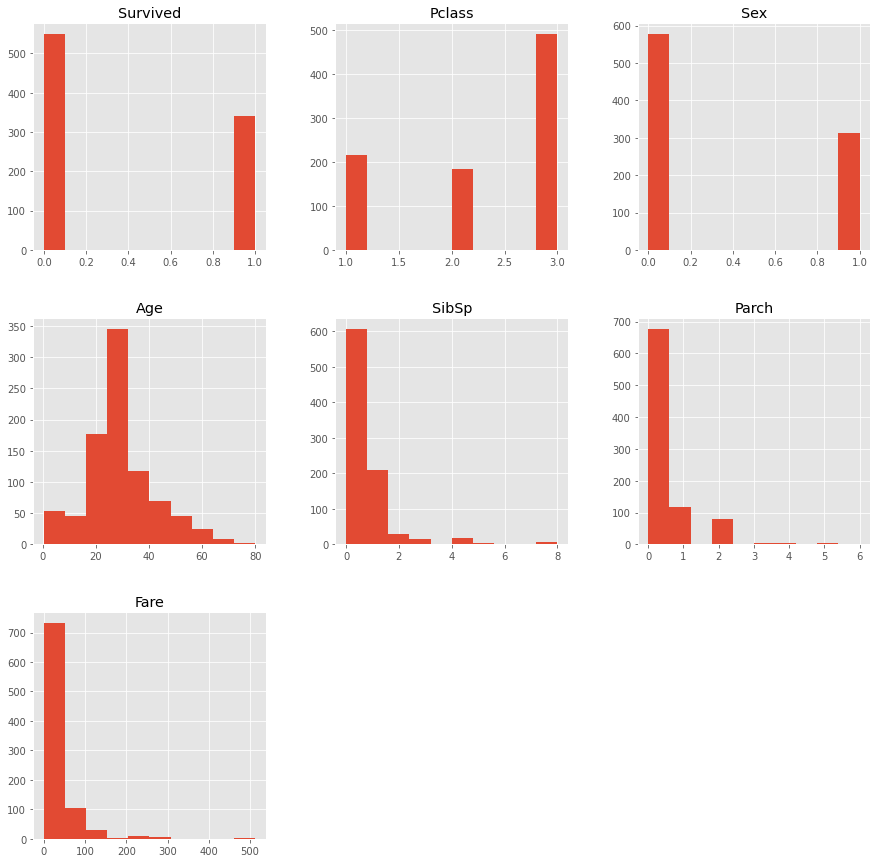

In [71]:
train_df.hist(figsize = (15, 15))

## 010

normalization doesn't make sense for Sex and Pclass column due to their categorical aspect.

In [72]:
def normalize_df(dataset:pd.DataFrame, valid_type = ['i','f'], restricted_columns = ['Survived']):
    return dataset.apply(
        lambda x: ((x - x.mean()) / x.std()) if x.dtype.kind in valid_type and x.name not in restricted_columns else x, 
        axis=0
        )

In [73]:
train_df = normalize_df(train_df)
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0.826913,-0.737281,-0.592148,0.432550,-0.473408,A/5 21171,-0.502163,S
1,1,-1.565228,1.354813,0.638430,0.432550,-0.473408,PC 17599,0.786404,C
2,1,0.826913,1.354813,-0.284503,-0.474279,-0.473408,STON/O2. 3101282,-0.488580,S


In [74]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,-7.575933e-17,1.594933e-17,2.272780e-16,3.588600e-17,4.585433e-17,-1.196200e-17
std,0.486592,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.565228e+00,-7.372810e-01,-2.251891e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,0.000000,-3.691575e-01,-7.372810e-01,-5.921480e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,0.000000,8.269128e-01,-7.372810e-01,0.000000e+00,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,1.000000,8.269128e-01,1.354813e+00,4.076970e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,1.000000,8.269128e-01,1.354813e+00,3.868699e+00,6.780355e+00,6.970233e+00,9.661740e+00


As we can see, mean is around 0 and standard deviation is equal to 1 which means that the normalization process was successful.

## 011

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [76]:
def get_intersections(survived_p, not_survived_p, x_ax, title) -> list[tuple]:
    intersections = np.argwhere(np.diff(np.sign(survived_p - not_survived_p))).flatten()
    points = []
    title = f"intersections for {title}"
    print(f"{title:_^50}")
    for intersection in intersections:
        mean_y = (survived_p[intersection] + not_survived_p[intersection]) / 2
        intersect_point = (x_ax[intersection], mean_y)
        points.append(intersect_point)
        printable_point = f"{intersect_point[0]:.3f}, {intersect_point[1]:.3f}"
        
        if survived_p[intersection] > not_survived_p[intersection]:
            left, right = "survived", "not survived"
        else :
            left, right = "not survived", "survived"
            
        print(f" - [{left:12}] ({printable_point:^14}) [{right:>12}]")
            
    print("_"*50)
    return points

In [77]:
def plot_columns(df, candidate_column):
    survived_mask = df["Survived"] == 1
    not_survived_mask = df["Survived"] == 0

    survived_df = df[survived_mask]
    not_survived_df = df[not_survived_mask]
    
    plt.style.use('ggplot')
    for col in candidate_column:
        survived_mean = survived_df[col].mean()
        survived_std = survived_df[col].std()

        dead_mean = not_survived_df[col].mean()
        dead_std = not_survived_df[col].std()

        start, end = min(survived_mean-4*survived_std, dead_mean-4*dead_std), max(survived_mean+4*survived_std, dead_mean+4*dead_std)
        x_axis = np.linspace(start, end, 200)
        survived_f = stats.norm.pdf(x_axis, survived_mean, survived_std)
        not_survived_f = stats.norm.pdf(x_axis, dead_mean, dead_std)

        intersections_points = get_intersections(survived_f, not_survived_f, x_axis, col)

        plt.plot(x_axis, survived_f, label="survived", color="blue")
        plt.plot(x_axis, not_survived_f, label="not survived", color="red")

        for index,point in enumerate(intersections_points):
            if index == 0:
                plt.plot(point[0], point[1], "go", label="intersection")
            else:
                plt.plot(point[0], point[1], "go")

        plt.axhline(0, color="black")
        plt.axvline(0, color="black")

        plt.title(col)
        plt.ylabel("probability")
        plt.xlabel("x")

        plt.legend()
        plt.show()

_____________intersections for Pclass_____________
 - [survived    ] (-0.281, 0.378 ) [not survived]
__________________________________________________


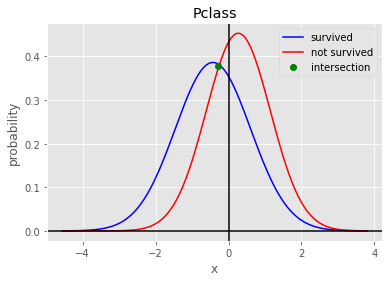

______________intersections for Sex_______________
 - [not survived] ( 0.216, 0.366 ) [    survived]
__________________________________________________


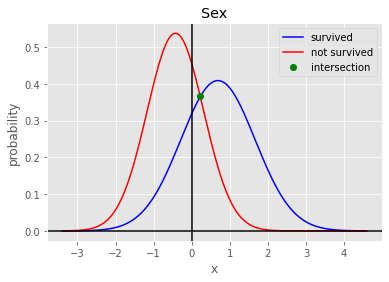

______________intersections for Age_______________
 - [survived    ] (-0.536, 0.344 ) [not survived]
 - [not survived] ( 1.892, 0.066 ) [    survived]
__________________________________________________


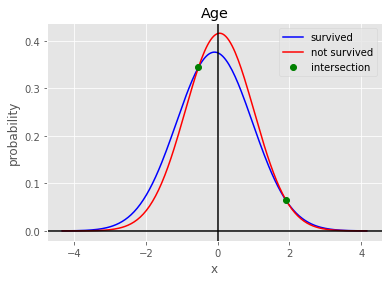

_____________intersections for SibSp______________
 - [not survived] (-0.935, 0.240 ) [    survived]
 - [survived    ] ( 0.756, 0.283 ) [not survived]
__________________________________________________


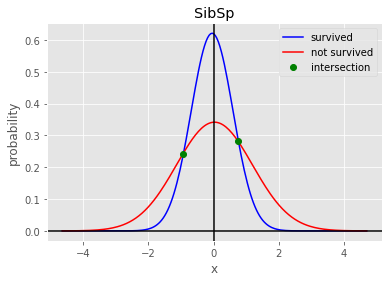

_____________intersections for Parch______________
 - [not survived] (-0.331, 0.377 ) [    survived]
 - [survived    ] ( 2.912, 0.006 ) [not survived]
__________________________________________________


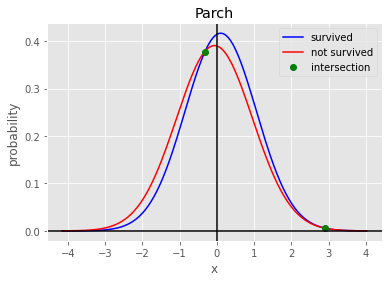

______________intersections for Fare______________
 - [survived    ] (-1.317, 0.137 ) [not survived]
 - [not survived] ( 0.568, 0.296 ) [    survived]
__________________________________________________


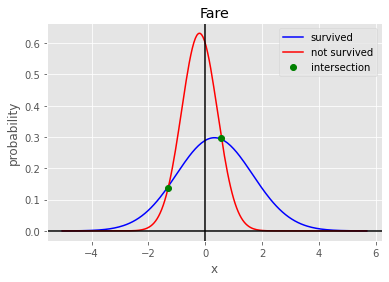

In [78]:
plot_columns(train_df, ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"])

The general analysis of the graphs and their meaning is that how the dispersion of a special property for survived/dead people is.

Our main criterion for choosing a feature is the difference between two graphs on the sides of the intersection(s).

My candidates for target-field is one of `Pclass`, `Fare`, `SibSp`or `Sex` because:
- in each of them One of the possibilities is considerably higher than the other(our criterion);
- A scenario can be recounted that shows the bold role of each

**attention**: due to `describe()` results, `Age` and `SibSp` columns, seems to be anomalous

For further analysis, we measure each property accuracy-rate using train-dataframe

In [79]:
predict_by_fare = lambda x: ((x['Fare'] <= -1.317385880239117) | (x['Fare'] >= 0.5682622146023517))
predict_by_sibsp = lambda x: ((-0.9350044995034374 <= x["SibSp"]) & (x["SibSp"] <= 0.755885508955167))
predict_by_pclass = lambda x: (x["Pclass"] <= -0.2809861708241712)
predict_by_sex = lambda x : (x["Sex"] >= 0.21551032104045298)

In [80]:
def test_models(df, **models):
    for label, model in models.items():
        acc_rate = ((model(df) == df["Survived"]).sum() / len(df)) * 100
        print(f"accuracy rate of {label}: {acc_rate:.1f}%")

In [81]:
test_models(train_df, 
           Fare=predict_by_fare, 
           SibSp=predict_by_sibsp, 
           Pclass=predict_by_pclass, 
           Sex=predict_by_sex)

accuracy rate of Fare: 66.3%
accuracy rate of SibSp: 42.2%
accuracy rate of Pclass: 66.8%
accuracy rate of Sex: 78.7%


**SibSp**:
we understand better that:
anomalies in potential features sometimes mirror 
anomalies in the label, which could make the column 
be (or seem to be) a powerful feature.

Due to the results, we will predict with regards to `Sex`

In [82]:
predict_rescue = predict_by_sex

## 012

### load test dataset

In [83]:
test_df = pd.read_csv(test_file)

### repair values

(actually, this step is not necessary here)

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [85]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

first, we fix our candidate columns for prediction

In [86]:
test_df["Fare"] = test_df["Fare"].fillna(value=test_df["Fare"].mean())
test_df["Sex"] = test_df["Sex"].replace(gender_identifier)

### normalize dataset

In [87]:
test_df = normalize_df(test_df, restricted_columns=["PassengerId","Pclass","Age"])
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",-0.755024,34.5,-0.498872,-0.399769,330911,-0.497811,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1.321292,47.0,0.616254,-0.399769,363272,-0.512660,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",-0.755024,62.0,-0.498872,-0.399769,240276,-0.464532,NaN,Q
3,895,3,"Wirz, Mr. Albert",-0.755024,27.0,-0.498872,-0.399769,315154,-0.482888,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.321292,22.0,0.616254,0.619154,3101298,-0.417971,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",-0.755024,14.0,-0.498872,-0.399769,7538,-0.472814,NaN,S
6,898,3,"Connolly, Miss. Kate",1.321292,30.0,-0.498872,-0.399769,330972,-0.501392,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",-0.755024,26.0,0.616254,0.619154,248738,-0.118681,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1.321292,18.0,-0.498872,-0.399769,2657,-0.508555,NaN,C
9,901,3,"Davies, Mr. John Samuel",-0.755024,21.0,1.731380,-0.399769,A/4 48871,-0.205535,NaN,S


### prediction

In [88]:
test_df = test_df.assign(SurviveP=predict_rescue)

### save

In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    float64
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    float64
 6   Parch        418 non-null    float64
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  SurviveP     418 non-null    bool   
dtypes: bool(1), float64(5), int64(2), object(4)
memory usage: 36.5+ KB


In [90]:
test_df["SurviveP"] = test_df["SurviveP"].astype(int)
test_df["Sex"] = test_df["Sex"].apply(lambda sex: "male" if sex <= 0 else "female")

In [91]:
test_df.to_csv("pred_results.csv", columns=["PassengerId", "Name", "Sex", "SurviveP"], index=False)

# Dependencies

In [92]:
%load_ext watermark
%watermark -vp numpy,matplotlib,pandas,scipy
%watermark -untz

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.9
IPython version      : 7.30.1

numpy     : 1.21.4
matplotlib: 3.5.1
pandas    : 1.3.5
scipy     : 1.7.3

Last updated: Fri Oct 28 2022 13:21:05Iran Standard Time

